In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import xarray as xr
import plotting_utils as pu

from utils import city_list
from utils import roar_code_path as project_code_path
from utils import roar_data_path as project_data_path
from utils import gev_metric_ids, gard_gcms, ensembles, ssps

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Set fonts
from matplotlib import font_manager
font_dirs = ["/storage/home/dcl5300/fonts"]

font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["axes.linewidth"] = 1.5

## Get city data

In [3]:
# # Run for all
# regrid_method = 'nearest'
# proj_slice = '2050-2100'
# hist_slice = '1950-2014'
# return_period = 100

# for metric_id in metric_ids:
#     sau.store_all_cities(metric_id, regrid_method, proj_slice, hist_slice, return_period, city_list)
#     print(metric_id)

## Plots

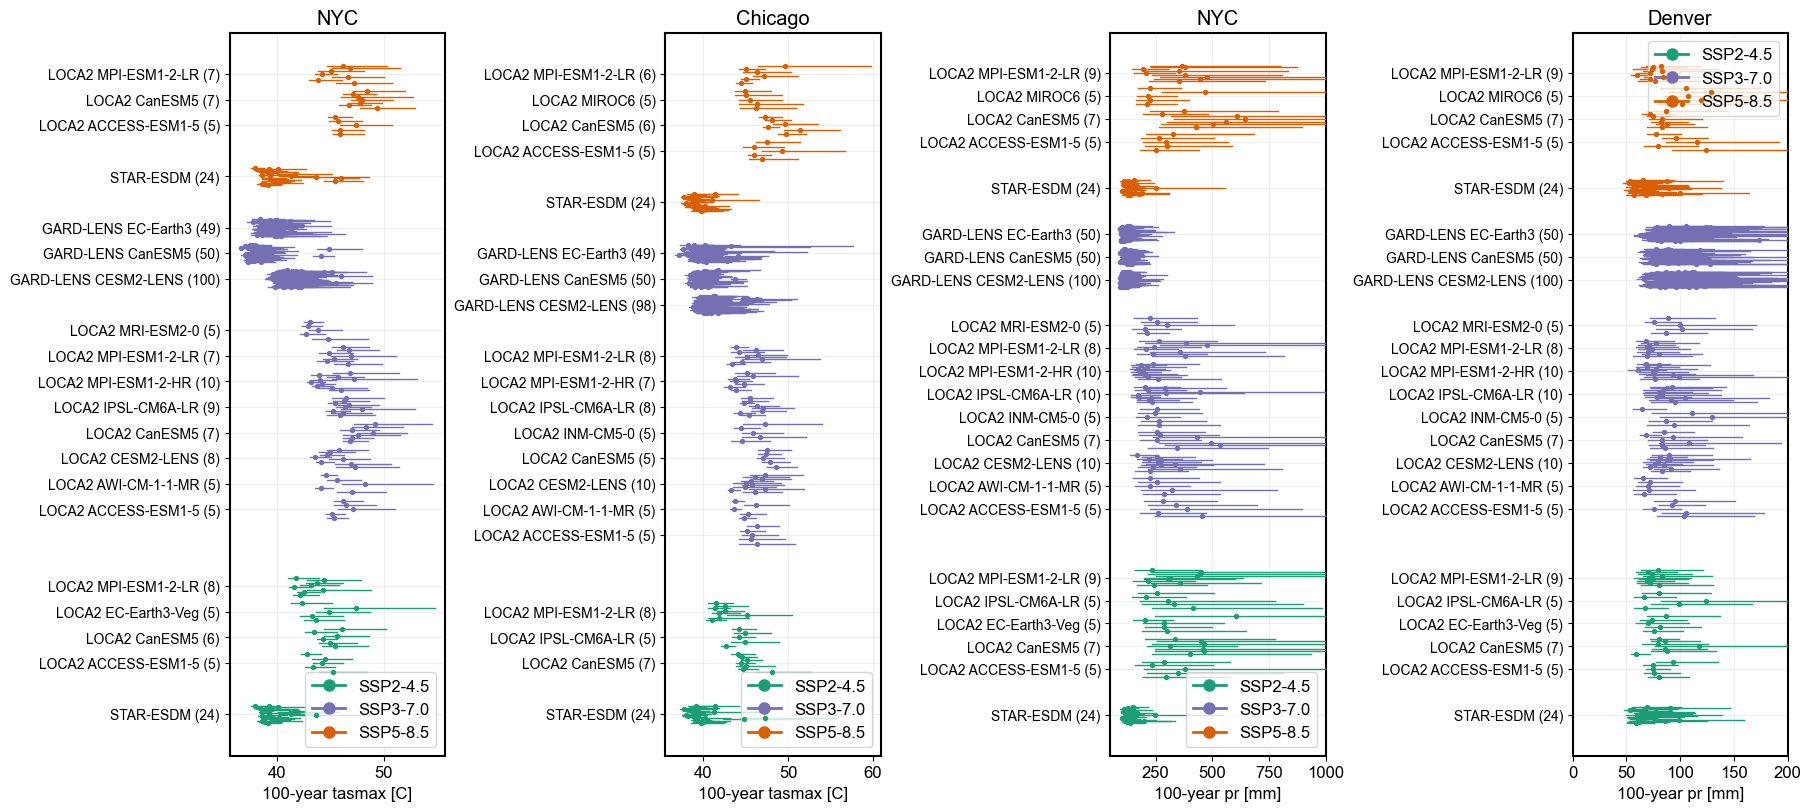

In [208]:
## Bayesian
store_path = f"{project_data_path}/extreme_value/cities/original_grid/bayes_combined/"

stationary = True
stationary_string = "stat" if stationary else "nonstat"

fig, axs = plt.subplots(1,4, figsize=(18,8), sharey=False, layout='constrained')

# NYC heat
city = 'nyc'
metric_id = 'max_tasmax'
df = pd.read_csv(f"{store_path}/{city}_{metric_id}_{stationary_string}.csv")
df_plot = df[(df["ssp"] != "historical") & df["rhat_good"]]
plot_boxplot_all_bayes(df=df_plot, 
                       plot_col = '100yr_return_level',
                       xlabel = '100-year tasmax [C]',
                       title = 'NYC',
                       min_members = 5,
                       lw = 1,
                       s = 8,
                       idx_step = 1,
                       ax=axs[0]
                      )

# Chicago heat
city = 'chicago'
metric_id = 'max_tasmax'
df = pd.read_csv(f"{store_path}/{city}_{metric_id}_{stationary_string}.csv")
df_plot = df[(df["ssp"] != "historical") & df["rhat_good"]]
plot_boxplot_all_bayes(df = df_plot, 
                       plot_col = '100yr_return_level',
                       xlabel = '100-year tasmax [C]',
                       title = 'Chicago',
                       min_members = 5,
                       lw = 1,
                       s = 8,
                       idx_step = 1,
                       ax=axs[1]
                      )

# NYC pr
city = 'nyc'
metric_id = 'max_pr'
df = pd.read_csv(f"{store_path}/{city}_{metric_id}_{stationary_string}.csv")
df_plot = df[(df["ssp"] != "historical") & df["rhat_good"]]
plot_boxplot_all_bayes(df = df_plot, 
                       plot_col = '100yr_return_level',
                       xlabel = '100-year pr [mm]',
                       title = 'NYC',
                       min_members = 5,
                       lw = 1,
                       s = 8,
                       idx_step = 1,
                       ax=axs[2]
                      )

axs[2].set_xlim([50,1000])

# Denver pr
city = 'denver'
metric_id = 'max_pr'
df = pd.read_csv(f"{store_path}/{city}_{metric_id}_{stationary_string}.csv")
df_plot = df[(df["ssp"] != "historical") & df["rhat_good"]]
plot_boxplot_all_bayes(df = df_plot, 
                       plot_col = '100yr_return_level',
                       xlabel = '100-year pr [mm]',
                       title = 'Denver',
                       min_members = 5,
                       lw = 1,
                       s = 8,
                       idx_step = 1,
                       ax=axs[3]
                      )

axs[3].set_xlim([0,200])

plt.show()

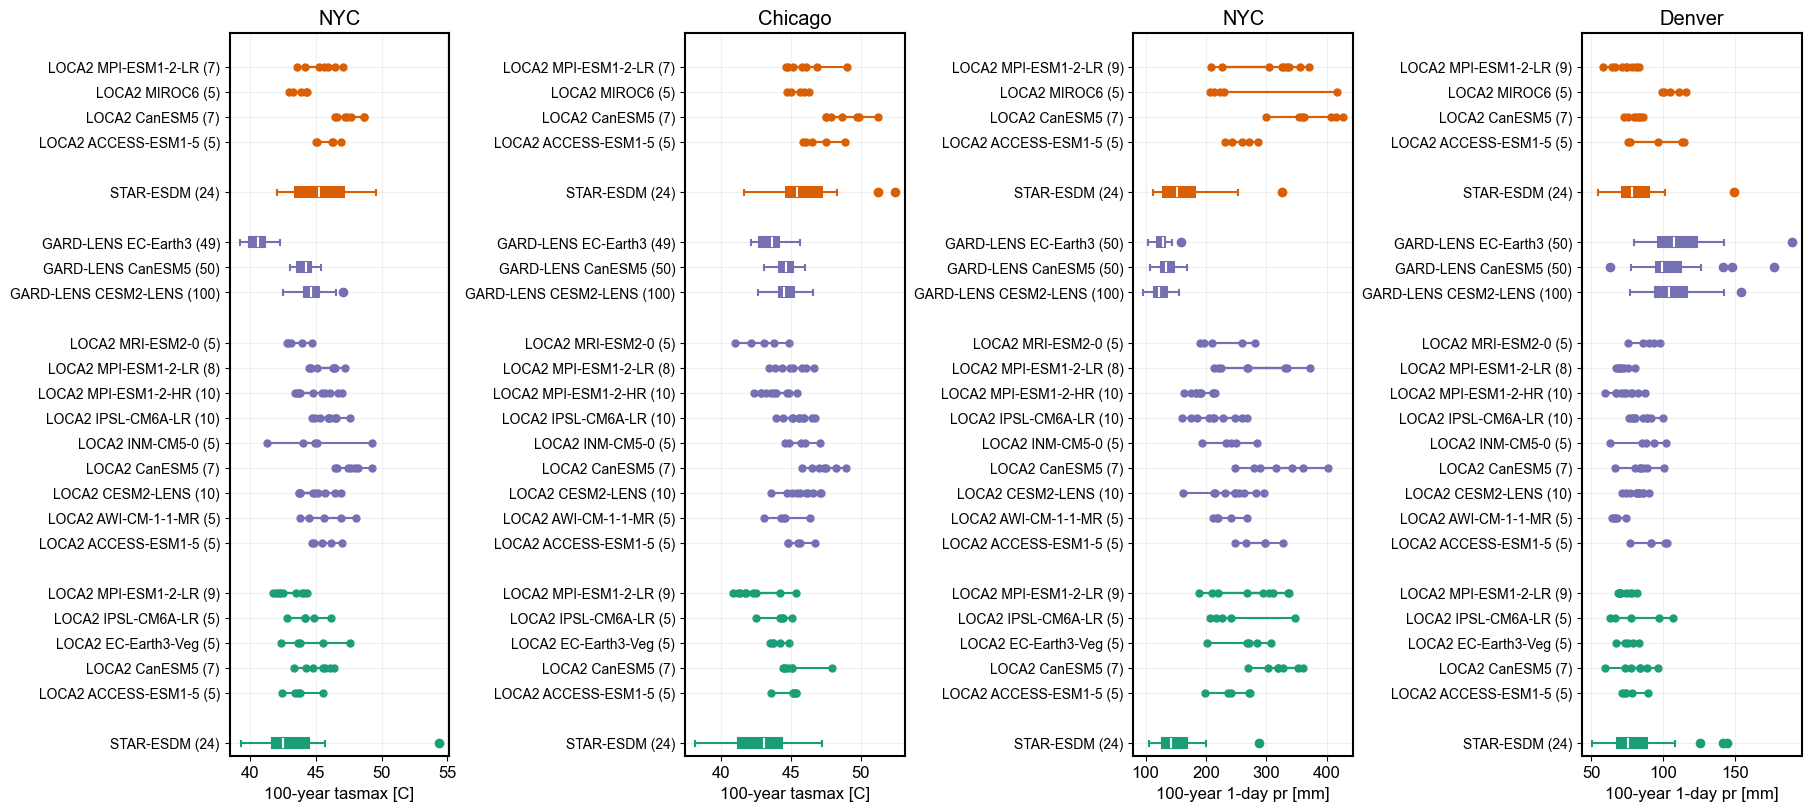

In [196]:
fig, axs = plt.subplots(1,4, figsize=(18,8), sharey=False, layout='constrained')

# pu.plot_city('nyc', 'min_tasmin', 100, axs[0], "100-year tasmin [C]", "NYC", True, min_members=7)
pu.plot_city('nyc', 'max_tasmax', 100, axs[0], "100-year tasmax [C]", "NYC", False, min_members=5, limits=[0,55])
pu.plot_city('chicago', 'max_tasmax', 100, axs[1], "100-year tasmax [C]", "Chicago", False, min_members=5, limits=[0,55])
pu.plot_city('nyc', 'max_pr', 100, axs[2], "100-year 1-day pr [mm]", "NYC", False, min_members=5)
pu.plot_city('denver', 'max_pr', 100, axs[3], "100-year 1-day pr [mm]", "Denver", False, min_members=5)

plt.show()

In [118]:
# # Overall plot info
# city = 'nyc'
# regrid_method = 'nearest'
# proj_slice = '2050-2100'
# hist_slice = '1950-2014'
# return_period = 100
# plot_col = "100yr_return_level"

# fig, axs = plt.subplots(1, 2, figsize=(12,6), sharey=True)

# # Plot tasmax
# ax = axs[0]
# metric_id = 'max_tasmax'
# xlabel = "100-year tasmax [C]"
# title = 'Extreme heat (2050-2100)'

# file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
# df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# pu.plot_all_boxplots(df = df_all[df_all['ssp'] != 'historical'], # drop historical
#                      plot_col = plot_col,
#                      xlabel = xlabel,
#                      title = title,
#                      legend = True,
#                      ax = ax)

# # Plot tasmax
# ax = axs[1]
# metric_id = 'min_tasmin'
# xlabel = "100-year tasmin [C]"
# title = 'Extreme cold (2050-2100)'

# file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
# df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# pu.plot_all_boxplots(df = df_all[df_all['ssp'] != 'historical'], # drop historical
#                      plot_col = plot_col,
#                      xlabel = xlabel,
#                      title = title,
#                      legend = False,
#                      ax = ax)

# plt.show()

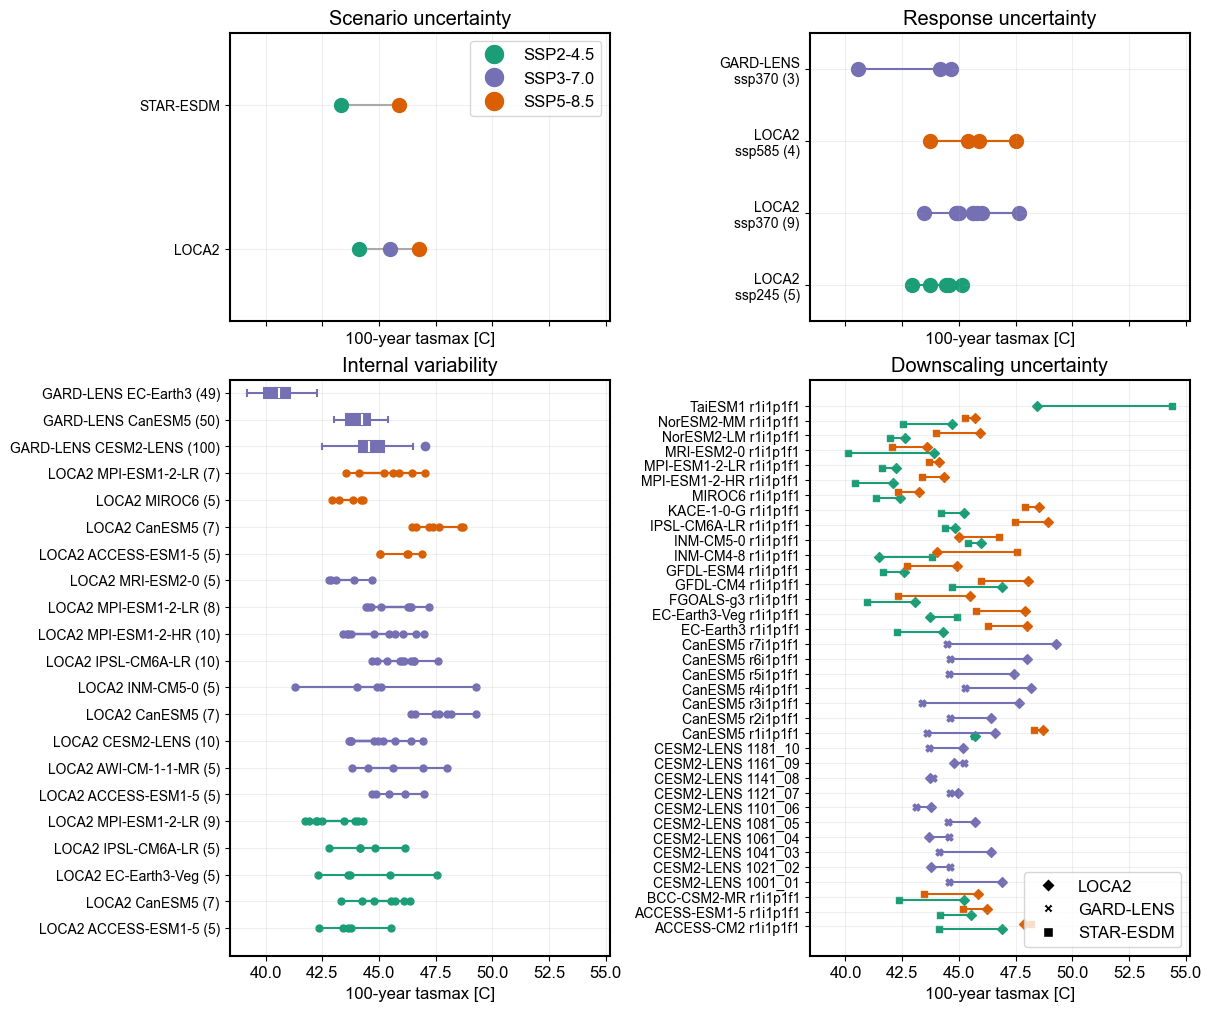

In [5]:
# Read all
metric_id = 'max_tasmax'
xlabel = "100-year tasmax [C]"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
                 plot_col = plot_col,
                 xlabel = xlabel)

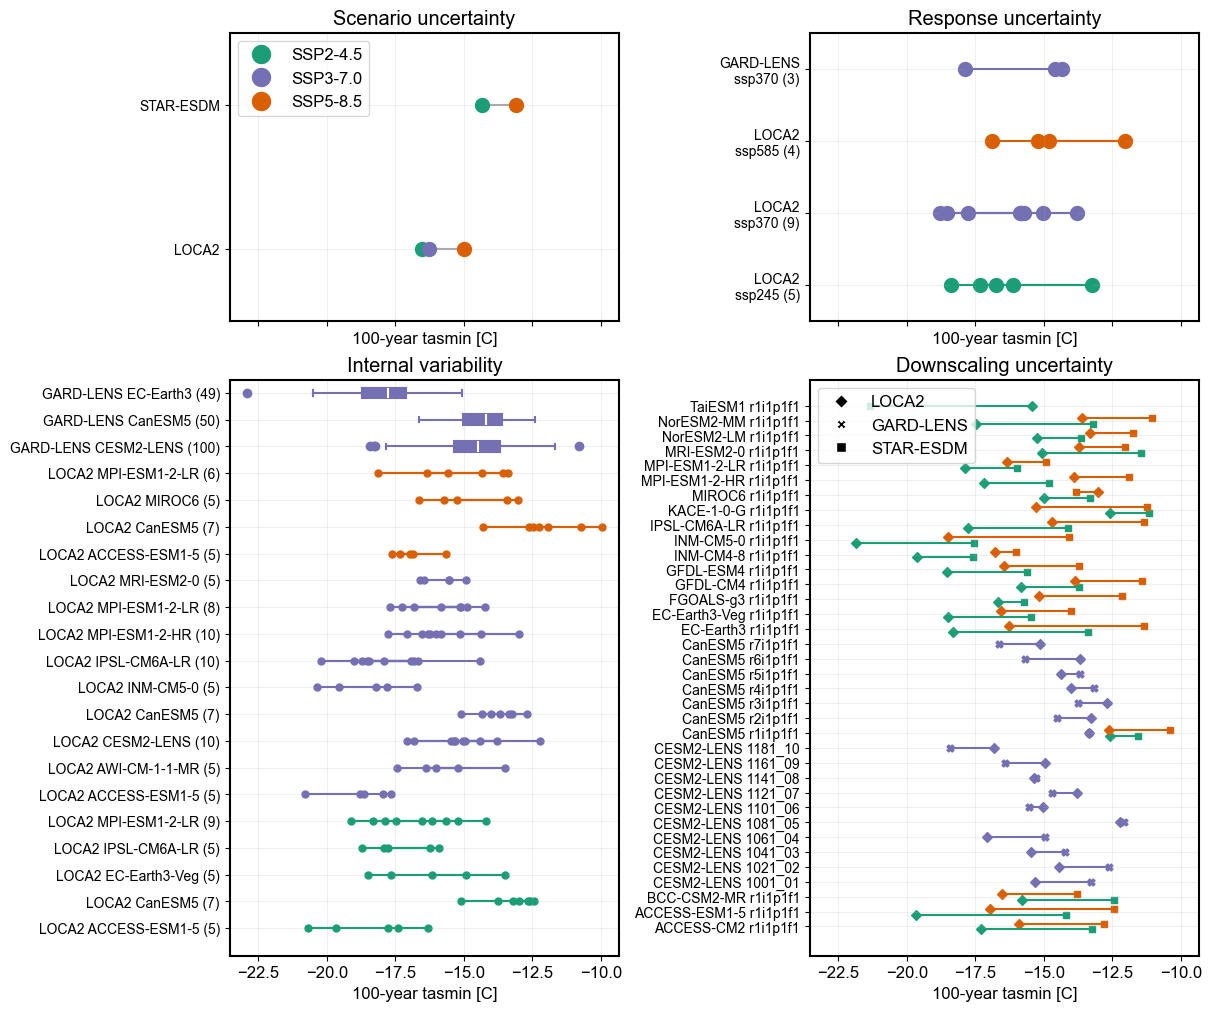

In [6]:
# Read all
metric_id = 'min_tasmin'
xlabel = "100-year tasmin [C]"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
                 plot_col = plot_col,
                 xlabel = xlabel)

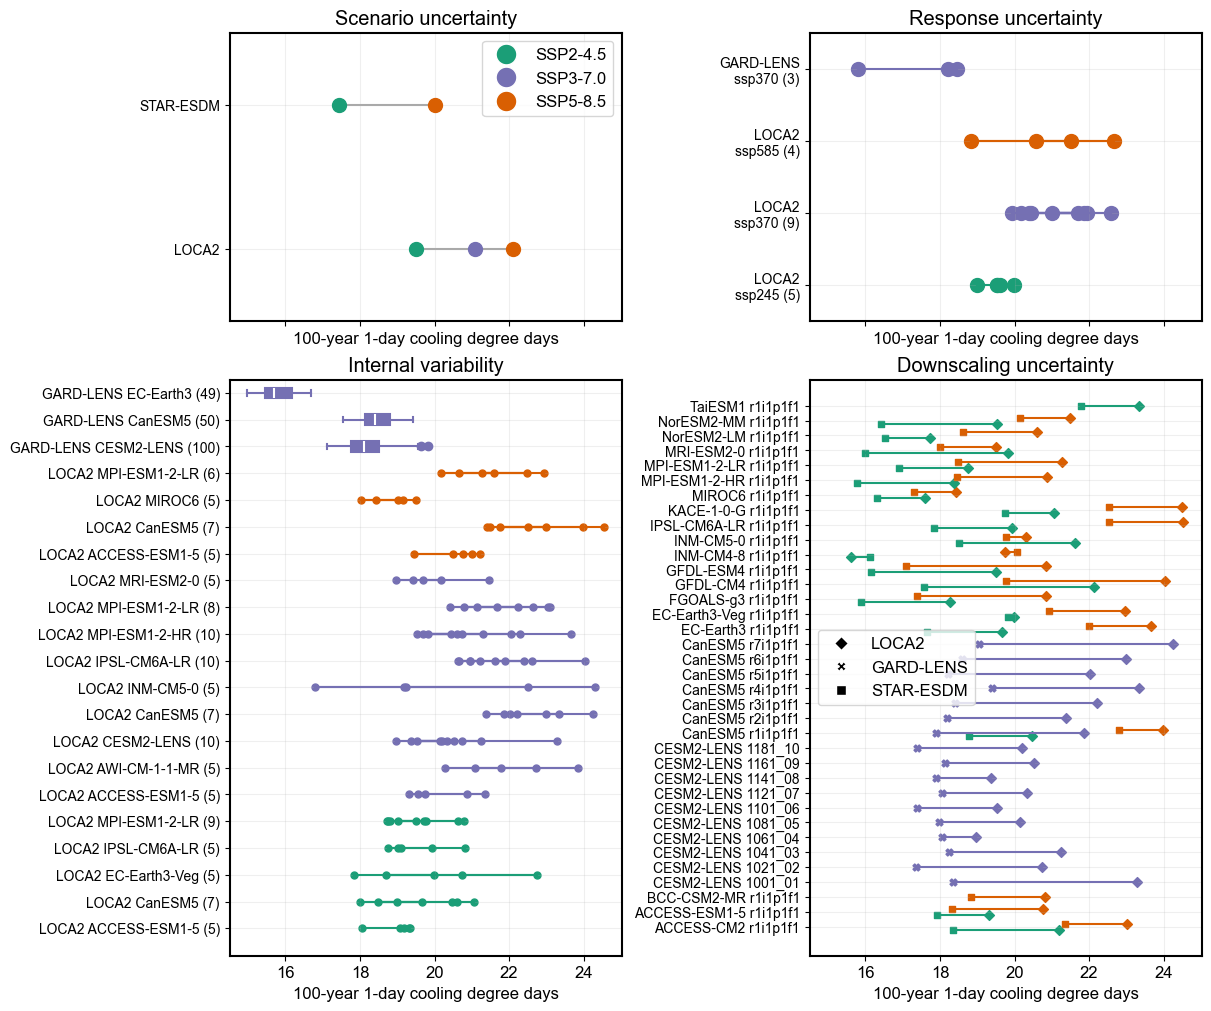

In [7]:
# Read all
metric_id = 'max_cdd'
xlabel = "100-year 1-day cooling degree days"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
                 plot_col = plot_col,
                 xlabel = xlabel)

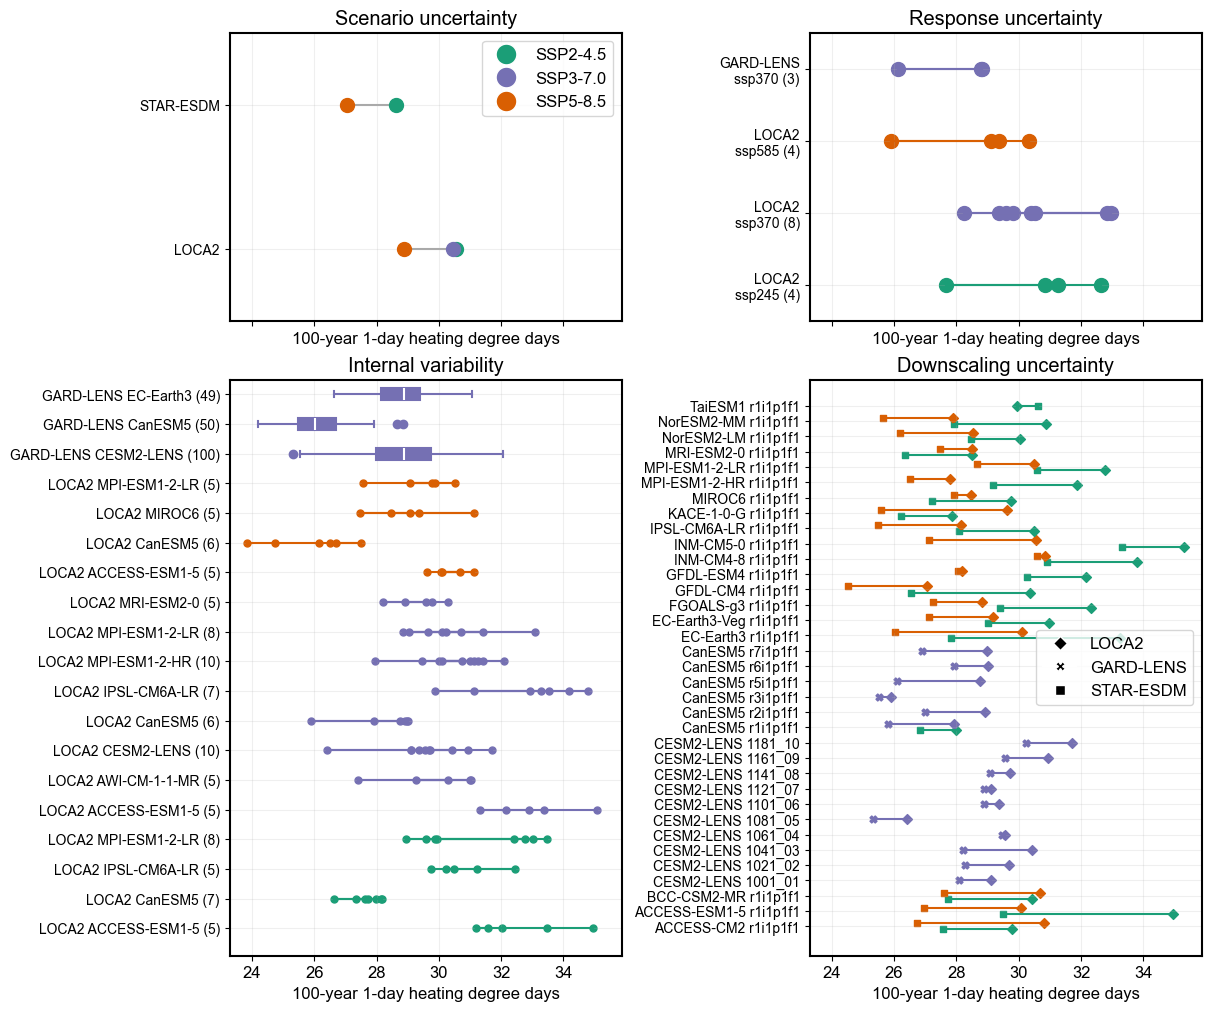

In [8]:
# Read all
metric_id = 'max_hdd'
xlabel = "100-year 1-day heating degree days"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
                 plot_col = plot_col,
                 xlabel = xlabel)

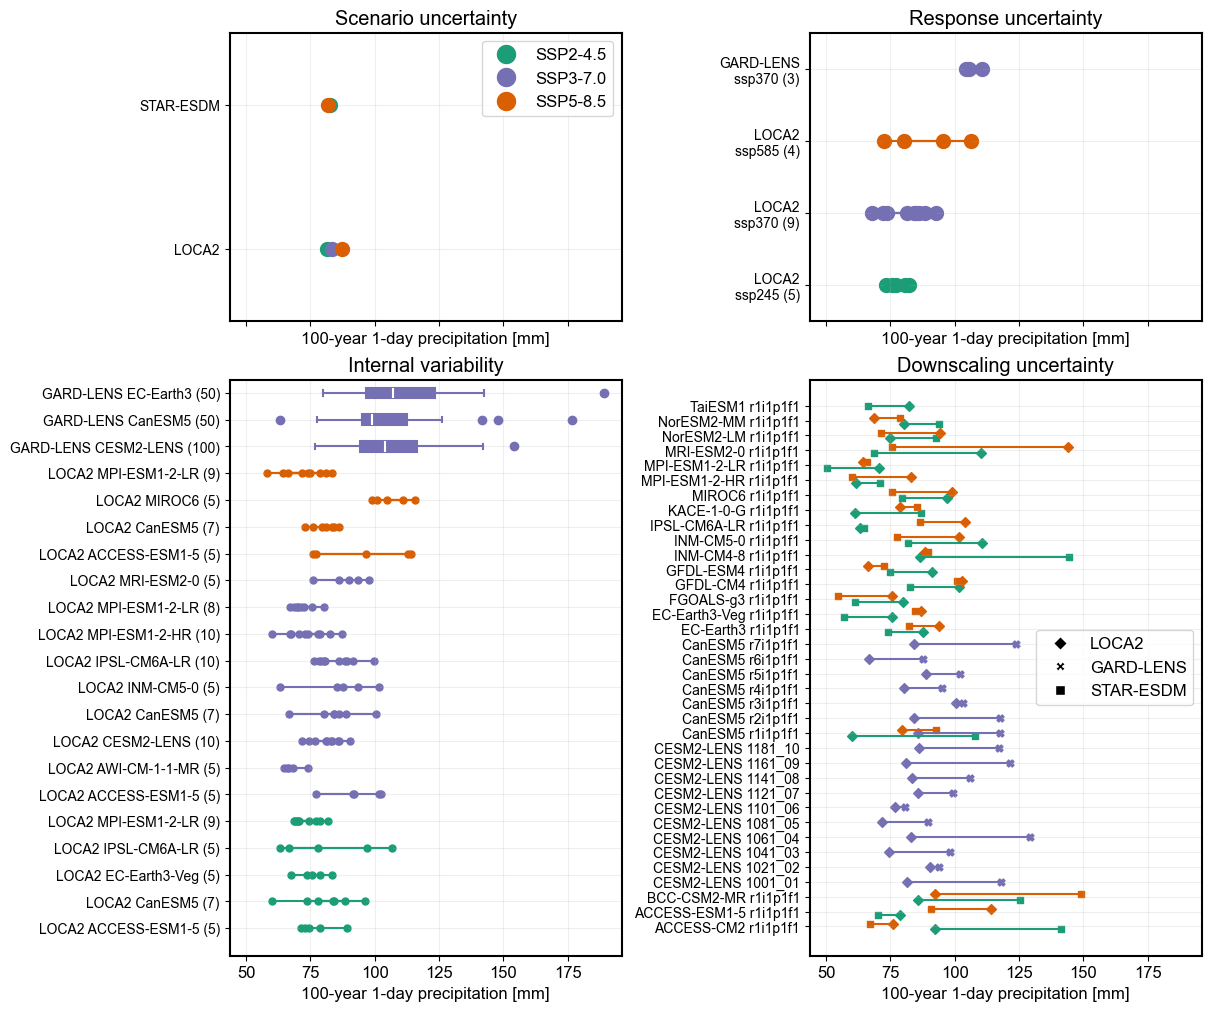

In [17]:
# Read all
metric_id = 'max_pr'
xlabel = "100-year 1-day precipitation [mm]"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'denver'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
                 plot_col = plot_col,
                 xlabel = xlabel)